

# Project: Investigate a Dataset on No-show appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>This project explores a dataset on No-show appointments. The datset has information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each of the rows of the datset as described below: ‘ScheduledDay’ tells us on what day the patient set up their appointment. ‘Neighborhood’ indicates the location of the hospital. ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família. 'N-show' last column: it says ‘0’ if the patient showed up to their appointment, and ‘1’ if they did not show up. What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment? This is the essential question we will try to understand in this project

In [120]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%  matplotlib inline

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
>Questions I want to ask

>1)Is a particular gender associated with no-show?
>
>2)Were the people reminded of their appointment with SMS has show up more ?
>
>3)How does the other factors affect the NO show?



## Data Wrangling

> In this section of the report, I will load in the data, check for cleanliness, and then trim and clean your dataset for analysis.

### General Properties

In [121]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [122]:
df.shape

(110527, 14)

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [124]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [125]:
# Rename colomn No-show to Noshow
df.rename(index=str, columns={"No-show": "Noshow"}, inplace= True)
df.head(5)


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Noshow
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [126]:
#changing the values of Yes to 1 and No to 0 in Noshow column
df.Noshow.replace(['Yes', 'No'], ['1', '0'], inplace=True)
#changing the datatype from string to int of column Noshow 
df['Noshow']=df['Noshow'].astype(int)
df.head(1)


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Noshow
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,0


## Data Cleaning
> As there are no Null values in the data set. In this section we are converting the PatientID datatype into int and trunctaing the time in ScheduledDay and AppointmentDay

In [127]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section
df.isnull().any()

PatientId         False
AppointmentID     False
Gender            False
ScheduledDay      False
AppointmentDay    False
Age               False
Neighbourhood     False
Scholarship       False
Hipertension      False
Diabetes          False
Alcoholism        False
Handcap           False
SMS_received      False
Noshow            False
dtype: bool

In [131]:
#converting the datatype of patientid to int
df.PatientId = df.PatientId.astype(int)
# trunctacing the time from date stamp

df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])

df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])
df['TimeSinceApt'] = df['AppointmentDay'] - df['ScheduledDay']
df.head(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Noshow,TimeSinceApt
0,-2147483648,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0,0 days


<a id='eda'></a>
## Exploratory Data Analysis

> In this section we compare the columns with  Noshow column and their relation visually and also by using groupby we compare three parameters at the same time

### Does No show has effected by other parameters??

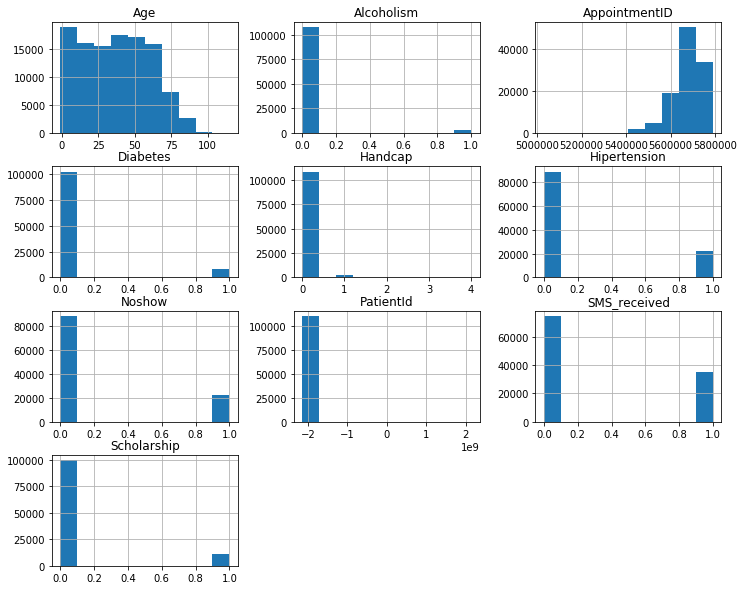

In [113]:
# brings up the histogram for all columns whose data types ar int and float
df.hist(figsize=(12,10));

> By histogram we are representing the data of columns. from the above information we can say that columns like Alocholism, Diabetes, Handcap, Hipertension, patiend id doesn't have much effect.


In [146]:
# caluclate number of people who did not show up when time since appointment taken was more than 1 day
df[df['TimeSinceApt'] > '1 days']['Noshow'].value_counts()

0    47337
1    19409
Name: Noshow, dtype: int64

In [148]:
# caluclate number of people who did not show up when time since appointment taken was less than 1 day
df[df['TimeSinceApt'] <= '1 days']['Noshow'].value_counts()

0    40871
1     2910
Name: Noshow, dtype: int64

>The number of no-shows is significantly less when the appointment is made within a day.

In [26]:
df.Noshow.value_counts()

0    88208
1    22319
Name: Noshow, dtype: int64

In [178]:
per=(88208/110527)*100
print('percentage of people shown up',per)
print('percentage of people didnt shown up',100-per)

percentage of people shown up 79.8067440534892
percentage of people didnt shown up 20.193255946510803


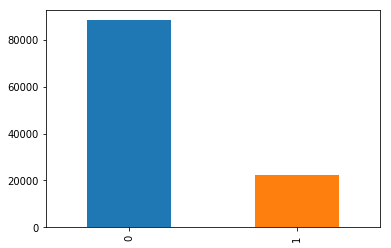

In [43]:
# in the Noshown column 1 means people didn't shown up and 0 means people shown up
df.Noshow.value_counts().plot(kind='bar');

> In the above bar chart we comparing the patients who shown with 0 and patients who doesn't show with 1. About 79.8% have shown up and only 20.1% doesn't show up

In [28]:
# calculating the no of people shown up and not shownup
show = (df.Noshow == 0)== True
No_show = (df.Noshow == 1)== True

In [29]:
# calculating mean of people age who shown up
df.Age[show].mean()

37.790064393252315

In [30]:
# calculating mean of people age who not shown up
df.Age[No_show].mean()

34.31766656212196

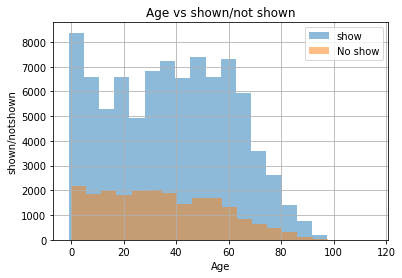

In [44]:
# plot a graph between age vs shown/ Noshown
df.Age[show].hist(alpha= 0.5,bins= 20, label='show')
df.Age[No_show].hist(alpha=0.5,bins =20, label='No show')
plt.legend();
plt.xlabel('Age')
plt.ylabel('shown/notshown')
plt.title('Age vs shown/not shown');

>In the above Histogram we are comparing the age with patients shown/ not shown up. The patients who shown up for the appointment are more when compared to pateints who not shown.

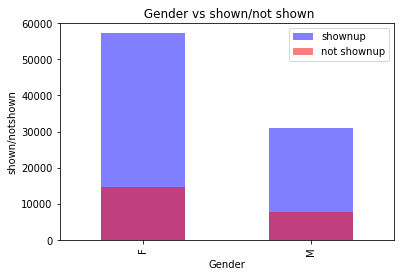

In [45]:
# plot a graph between gender vs shown/ Noshown
df.Gender[show].value_counts().plot(kind='bar',alpha =0.5,color='blue',label='shownup')
df.Gender[No_show].value_counts().plot(kind='bar',alpha =0.5,color='red',label='not shownup')
plt.legend()
plt.xlabel('Gender')
plt.ylabel('shown/notshown')
plt.title(' Gender vs shown/not shown')
plt.legend();

>In the above bar chart between Gender versus shown/ not shown. from the graph and below statics we can say among the patients most of them are female 

In [48]:
print(df.Gender.value_counts())
print('percentage of women ',(71840/110527)*100)
print('percentage of men',(38687/110527)*100)

print(df.Gender[show].value_counts())
print('percentage of women shown up',(57246/110527)*100)
print('percentage of men shown up',(30962/110527)*100)
print(df.Gender[No_show].value_counts())
print('percentage of women not shown up',(14594/110527)*100)
print('percentage of men not shown up',(7725/110527)*100)


F    71840
M    38687
Name: Gender, dtype: int64
percentage of women  64.99769287142509
percentage of men 35.00230712857492
F    57246
M    30962
Name: Gender, dtype: int64
percentage of women shown up 51.793679372461035
percentage of men shown up 28.013064681028165
F    14594
M     7725
Name: Gender, dtype: int64
percentage of women not shown up 13.204013498964054
percentage of men not shown up 6.989242447546753


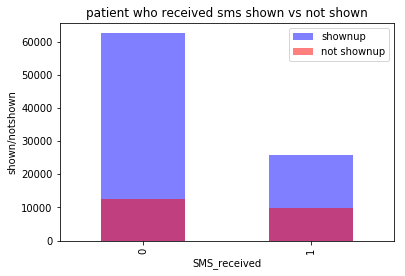

In [49]:
# plot a graph between SMS_Recieved vs shown/ Noshown
df.SMS_received[show].value_counts().plot(kind='bar',alpha =0.5,color='blue',label='shownup')
df.SMS_received[No_show].value_counts().plot(kind='bar',alpha =0.5,color='red',label='not shownup')
plt.xlabel('SMS_received')
plt.ylabel('shown/notshown')
plt.title("patient who received sms shown vs not shown")
plt.legend();


In the above bar chart we are comparing the SMS_received  with patients shown/ Not shown for the appointment. From the below statics we can say most of the patients didn't recieve SMS 

In [56]:
print(df.SMS_received[show].value_counts())
print('percentage of patients who didnt recieve a message shown up',(62510/75045)*100)
print('percentage of patients who didnt recieve a message not shown up',(12535/75045)*100)
print(df.SMS_received[No_show].value_counts())
print('percentage of patients who  recieve a message shown up',(25698/35482)*100)
print('percentage of patients who  recieve a message not shown up',(9784/35482)*100)
print(df.SMS_received.value_counts())
print('percentage of patients who didnt recieve a message',(75045/110527)*100)
print('percentage of patients who  recieve a message',(35482/110527)*100)


0    62510
1    25698
Name: SMS_received, dtype: int64
percentage of patients who didnt recieve a message shown up 83.29668865347458
percentage of patients who didnt recieve a message not shown up 16.703311346525417
0    12535
1     9784
Name: SMS_received, dtype: int64
percentage of patients who  recieve a message shown up 72.425455160363
percentage of patients who  recieve a message not shown up 27.574544839637
0    75045
1    35482
Name: SMS_received, dtype: int64
percentage of patients who didnt recieve a message 67.89743682539108
percentage of patients who  recieve a message 32.10256317460892


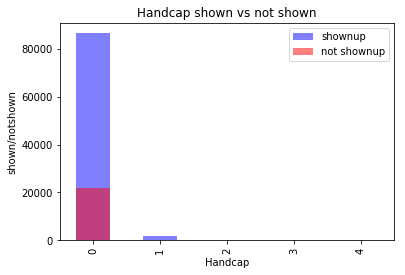

In [57]:
# plot a graph between Handcap vs shown/ Noshown
df.Handcap[show].value_counts().plot(kind='bar',alpha =0.5,color='blue',label='shownup')
df.Handcap[No_show].value_counts().plot(kind='bar',alpha =0.5,color='red',label='not shownup')
plt.xlabel('Handcap')
plt.ylabel('shown/notshown')
plt.title("Handcap shown vs not shown")
plt.legend();

>In the above bar graph we are comparing the hancap with patients who shown/not shown. Hancap has four level of disability. Patients with level zero diability

In [66]:
print(df.Handcap[show].value_counts())
print(df.Handcap[No_show].value_counts())
print(df.Handcap.value_counts())

print('percentage of patients with level 0 disability',(108286/110527)*100)
print('percentage of patients with level 1 disability',(2042/110527)*100)
print('percentage of patients with level 2 disability', (183/110527)*100)
print('percentage of patients with level 3 disability',(13/110527)*100)
print('percentage of patients with level 4 disability',(3/110527)*100)

0    86374
1     1676
2      146
3       10
4        2
Name: Handcap, dtype: int64
0    21912
1      366
2       37
3        3
4        1
Name: Handcap, dtype: int64
0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64
percentage of patients with level 0 disability 97.97244112298353
percentage of patients with level 1 disability 1.8475123725424556
percentage of patients with level 2 disability 0.16557040361178718
percentage of patients with level 3 disability 0.011761831950564116
percentage of patients with level 4 disability 0.002714268911668642


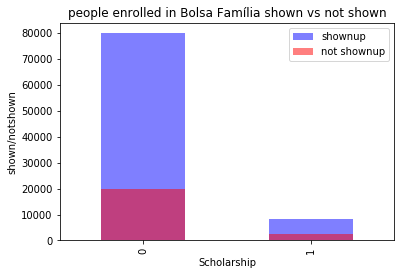

In [68]:
# plot a graph between Scholarship vs shown/ Noshown
df.Scholarship[show].value_counts().plot(kind='bar',alpha =0.5,color='blue',label='shownup')
df.Scholarship[No_show].value_counts().plot(kind='bar',alpha =0.5,color='red',label='not shownup')
plt.xlabel('Scholarship')
plt.ylabel('shown/notshown')
plt.title("people enrolled in Bolsa Família shown vs not shown")
plt.legend();

In the above bar chart we are comparing scholarship with patients who shown/ Not shown.  Most of the people didnt enroll in Bolsa Familia but people do showup.

In [192]:
print(df.Scholarship[show].value_counts())
df.Scholarship.value_counts()

0    79925
1     8283
Name: Scholarship, dtype: int64


0    99666
1    10861
Name: Scholarship, dtype: int64

### How does the Noshow effected while considering two parameters??

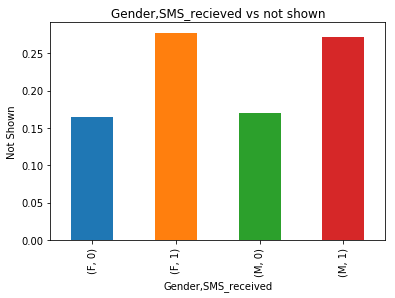

In [70]:
# plot a graph between Gender,SMS_Received vs Notshown
df.groupby(['Gender','SMS_received']).Noshow.mean().plot(kind='bar')
plt.ylabel('Not Shown')
plt.title("Gender,SMS_recieved vs not shown");


>In the above graph we are comparing the Gender,SMS_received with not shown mean. Male and female patients who recieved SMS are more likely didnt shown up

In [73]:
df.groupby(['Gender','SMS_received']).Noshow.value_counts()

Gender  SMS_received  Noshow
F       0             0         39764
                      1          7874
        1             0         17482
                      1          6720
M       0             0         22746
                      1          4661
        1             0          8216
                      1          3064
Name: Noshow, dtype: int64

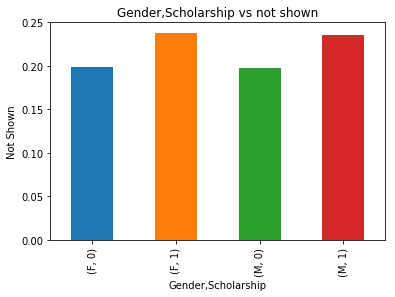

In [74]:
# plot a graph between Gender,Scholarship vs Notshown
df.groupby(['Gender','Scholarship']).Noshow.mean().plot(kind='bar')
plt.ylabel('Not Shown')
plt.title("Gender,Scholarship vs not shown");

>In the above graph we are comparing the Gender,Scholarship with not shown mean. We dont to do with this parameters

In [214]:
df.groupby(['Gender','Scholarship']).Noshow.value_counts()

Gender  Scholarship  Noshow
F       0            0         50499
                     1         12488
        1            0          6747
                     1          2106
M       0            0         29426
                     1          7253
        1            0          1536
                     1           472
Name: Noshow, dtype: int64

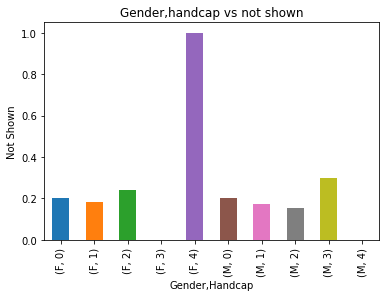

In [75]:
# plot a graph between Gender,Handcap vs Notshown
df.groupby(['Gender','Handcap']).Noshow.mean().plot(kind='bar')
plt.ylabel('Not Shown')
plt.title("Gender,handcap vs not shown");

>In the above graph we are comparing the Gender,Handcap with not shown mean. We can say female patients with level 4 disabilty
didnt shown up for the appointment

In [222]:
df.groupby(['Gender','Handcap']).Noshow.value_counts()

Gender  Handcap  Noshow
F       0        0         56199
                 1         14351
        1        0           964
                 1           217
        2        0            80
                 1            25
        3        0             3
        4        1             1
M       0        0         30175
                 1          7561
        1        0           712
                 1           149
        2        0            66
                 1            12
        3        0             7
                 1             3
        4        0             2
Name: Noshow, dtype: int64

In [ ]:
df.groupby(['Gender','AppointmentID']).Noshow.mean().plot(kind='bar');

<a id='conclusions'></a>
## Conclusions

>From the above data we can suggest the factors affecting the patients to shown up at the appointment.1)Time since appointment definitely is an important factor when it comes to showing up for an appoitnment. A person who makes an appoitnment within a day of appointment is more likely to come to the appointment 2)From the data we can say that most of the patients are women and the women with disability level 4 has not shown most among the handicapped.3) when coming to people who didn't receive message has shown up more. 4) factors like hypertenson, diabetes and alcoholism has no effect.4) factors Like appointment id and neighbourhood are difficult to comapare.



In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])